<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [21]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [22]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [23]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [24]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## TASK 2
# For the Median value of owner-occupied homes" provide a boxplot

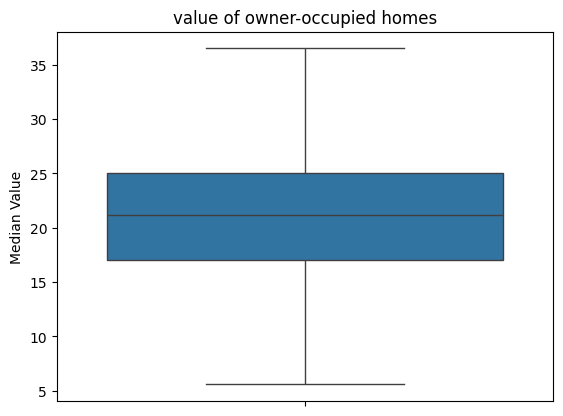

In [37]:

sns.boxplot(data =boston_df,y='MEDV',showfliers=False)
pyplot.title('value of owner-occupied homes')
pyplot.ylabel("Median Value")
pyplot.show()


#### the Median value of owner-occupied homes is approximately "21"

## Task2
# Provide a  bar plot for the Charles river variable

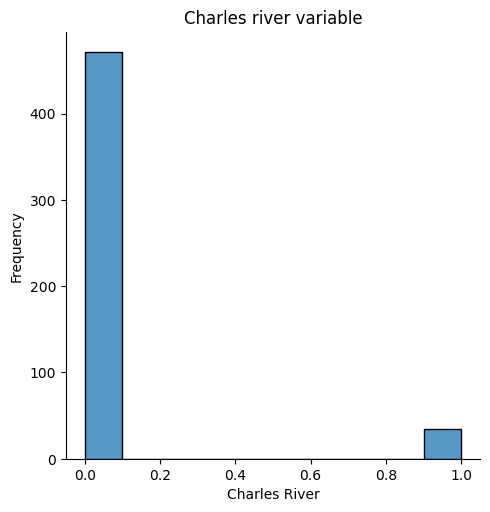

In [26]:
distplot = sns.displot(boston_df['CHAS'])
pyplot.title("Charles river variable")
pyplot.xlabel("Charles River")
pyplot.ylabel("Frequency")
pyplot.show()

#### Most of the records are not tract bounds river

## TASK 2
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

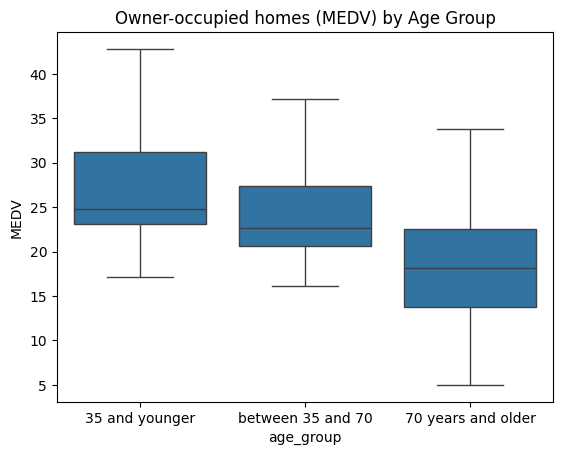

In [27]:

boston_df['age_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 and younger', 'between 35 and 70', '70 years and older'], include_lowest=True)
sns.boxplot(x="age_group", y="MEDV", data=boston_df,showfliers=False)
pyplot.title('Owner-occupied homes (MEDV) by Age Group')
pyplot.show()

#### The Median for the group "35 years and younger" is approximately 25, for "70 years and older" the Median is approximately 19 and for "Between 35 and 70 years" group the Median is approximately 22

## TASK 2
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?


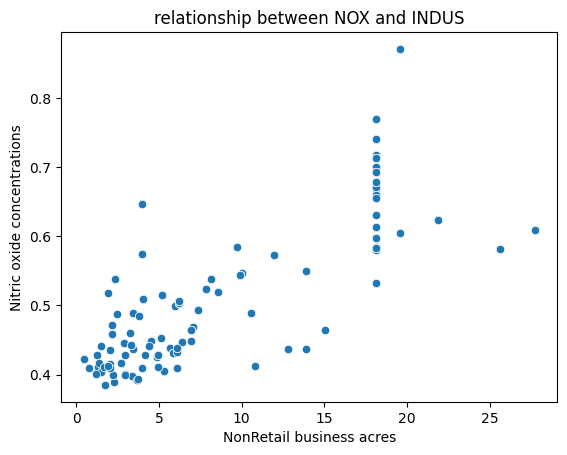

In [39]:

sns.scatterplot(x="INDUS", y="NOX", data=boston_df)
pyplot.title("relationship between NOX and INDUS")
pyplot.xlabel("NonRetail business acres")
pyplot.ylabel("Nitric oxide concentrations")
pyplot.show()

## The less the proportion of non-retail business acres, the less the Nitric oxide concentrations.

## Task 2
# Create a histogram for the pupil to teacher ratio variable

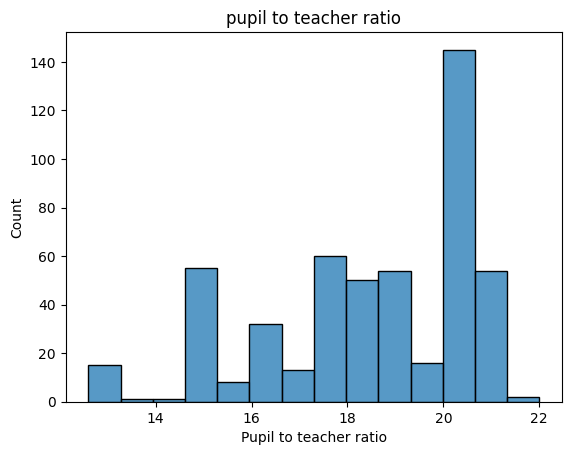

In [40]:

sns.histplot (x="PTRATIO",data=boston_df)
pyplot.title("pupil to teacher ratio")
pyplot.xlabel("Pupil to teacher ratio")
pyplot.show()

#### The Highest distribution of pupil to teacher ratio is 20 and the less is 14

## Task 3
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [30]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var =False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

#### a = 0,05
#### H0 = "There is no significant difference in median values of houses bounded by charles river"
#### H1 = "There is a significant difference in median values of houses bounded by charles river"
#### conclusion : we reject the null hypothesis since P value is less than 0,05 , so there is a siginificant difference in median values of houses bounded by charles river

## Task 3
## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [31]:
# First we need to categorize the age variable since ANOVA doesnt work with continuous variables.
boston_df.loc[boston_df['AGE'] <= 30, 'Age_Group'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 30) & (boston_df['AGE'] < 70), 'Age_Group'] = "Between 35 and 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = "70 and older"

#### a = 0,05
#### H0 = M1 = M2 = M3
#### H1 at least one of the means differ

In [32]:
#Then, test the equality of variance

scipy.stats.levene(boston_df[boston_df['Age_Group'] == "35 and younger"]['MEDV'],
                   boston_df[boston_df['Age_Group'] == "Between 35 and 70"]['MEDV'], 
                   boston_df[boston_df['Age_Group'] == "70 and older"]['MEDV'], 
                   center='mean')

LeveneResult(statistic=1.9263167703439634, pvalue=0.14675700390882251)

In [33]:
# First, separate the three samples (one for each category) into a variable each.
thirtyfive_lower = boston_df[boston_df['Age_Group'] == "35 and younger"]['MEDV']
thirtyfive_seventy = boston_df[boston_df['Age_Group'] == "Between 35 and 70"]['MEDV']
seventy_older = boston_df[boston_df['Age_Group'] == "70 and older"]['MEDV']

In [34]:
# Now run one way ANOVA test
scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)

F_onewayResult(statistic=34.249179272635395, pvalue=1.135217093487225e-14)

#### CONCLUSION: Since the p-value is less than alpha value, we reject the null hypothesis as there is enough proof that there is a statistical difference in Median values of houses for each proportion of owner occupied units built prior to 1940.

## Task 3
## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

#### a = 0,05
#### H0:There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
#### H1:There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [35]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

#### Conclusion : since p value is less than alpha we rejectthe null hypothesis , so there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

## Task 3
## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

#### a = 0,05
#### H0 = There is no impact of additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes
#### H1 = There is an impact

In [36]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 13 Sep 2025   Prob (F-statistic):           1.21e-08
Time:                        23:34:23   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion: p value is less than alpha so we reject the null hypothesis
#### so there is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
#### The coefficient is positive 0.0572